In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import math

In [2]:
def calculate_histogram(image):
    histogram = [0]*256  # Initialize histogram bins
    
    # Loop through each pixel and update histogram
    for row in image:
        row = row.astype(np.int32)
        for pixel in row:
            histogram[pixel] += 1
    
    return np.array(histogram)

def csum(l):   #calculates the cumulative sum of the pixels
    l1=[]
    a=0
    for i in l:
        a+=i
        l1.append(a)
    return np.array(l1)

def hist_eq(image):  #performs histogram equalisation
    final=np.zeros(image.shape)
    histogram = calculate_histogram(image)
    cumulativesum=csum(histogram)
    cdfnorm=(((cumulativesum - cumulativesum.min()) / (cumulativesum.max()-cumulativesum.min()))*255)
    cdfnorm1 = np.round_(cdfnorm)
    for j in range(image.shape[0]):   #loop through the pixels and update to the new pixel values
        row=image[j]
        for i in range(row.shape[0]):
            p1=int(row[i])
            a=cdfnorm1[p1]
            final[j][i] = a
    
    return final

def mse(im1,im2):  #calculate the mse loss between any 2 image np arrays
    a=0
    l1=np.subtract(im1,im2)
    l2=np.square(l1)
    l3=np.mean(l2)
    return l3

def graph(image):  #used for plotting the graph and return normalised cdf
    histogram = calculate_histogram(image)
    cumulativesum=csum(histogram)
    cdfnorm=(((cumulativesum - cumulativesum.min()) / (cumulativesum.max()-cumulativesum.min()))*255)
    cdfnorm1 = np.round_(cdfnorm)
    cdf_normalized = cumulativesum * float(histogram.max()) / cumulativesum.max()
    return histogram, cdf_normalized

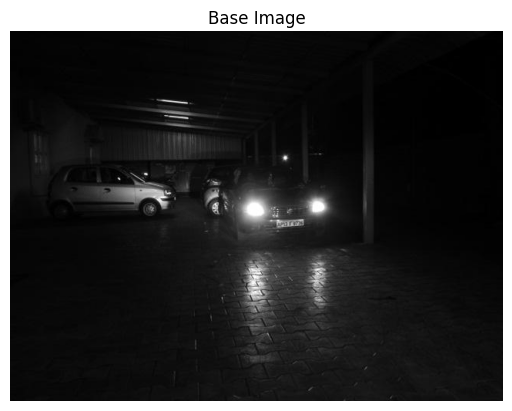

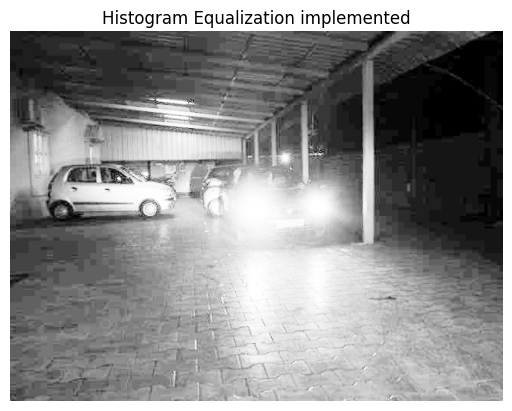

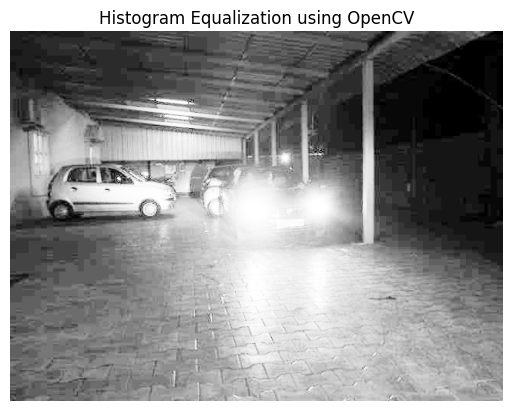

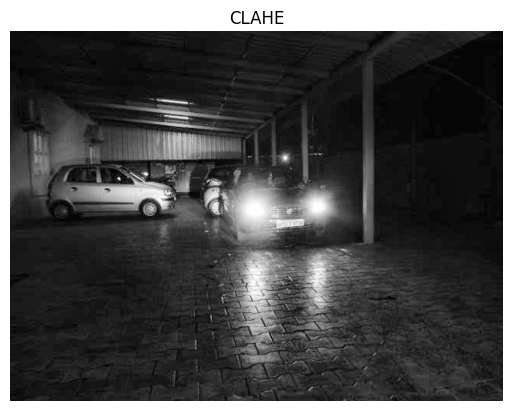

MSE Loss of Implemented HE vs Builtin HE =  1.3020833333333334e-05
MSE Loss of Implemented HE vs Builtin CLAHE =  8790.44966796875
MSE Loss of Builtin CLAHE vs Builtin HE =  98.55888671875


In [3]:
image = np.loadtxt(r'C:\Users\harsh\Desktop\ELL 715\Assignment 1\car.csv', delimiter=',')

src=cv2.imread(r"C:\Program Files\MATLAB\R2022a\toolbox\images\imdata\car_3.jpg")
src1 = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#display the original image
plt.imshow(src1, cmap='gray') 
plt.title('Base Image')
plt.axis('off')
plt.show()

#apply histogram equalization
p=hist_eq(image)
plt.imshow(p, cmap='gray')
plt.title('Histogram Equalization implemented')
plt.axis('off')
plt.show()

#apply builtin hostogram equalization
dst = cv2.equalizeHist(src1)
cv2.imwrite('eqcv.png',dst)
i1=cv2.imread(r"C:\Users\harsh\Desktop\ELL 715\Assignment 1\eqcv.png")
i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2GRAY)
plt.imshow(i1, cmap='gray')
plt.title('Histogram Equalization using OpenCV')
plt.axis('off')
plt.show()

#apply Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl1 = clahe.apply(src1)
cv2.imwrite('clahe_2.png',cl1)
cla=cv2.imread(r"C:\Users\harsh\Desktop\ELL 715\Assignment 1\clahe_2.png")
cla = cv2.cvtColor(cla, cv2.COLOR_BGR2GRAY)
plt.imshow(cla, cmap='gray')
plt.title('CLAHE')
plt.axis('off')
plt.show()

#Calculate the mse losses between the images
loss1=mse(p,i1)
loss2=mse(p,cla)
loss3=mse(cla,i1)
print("MSE Loss of Implemented HE vs Builtin HE = ",loss1)
print("MSE Loss of Implemented HE vs Builtin CLAHE = ",loss2)
print("MSE Loss of Builtin CLAHE vs Builtin HE = ",loss3)

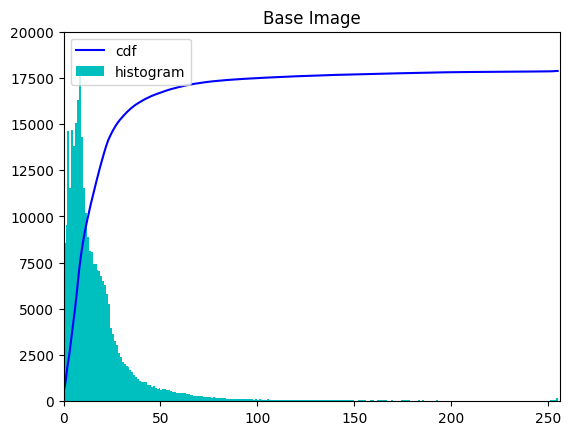

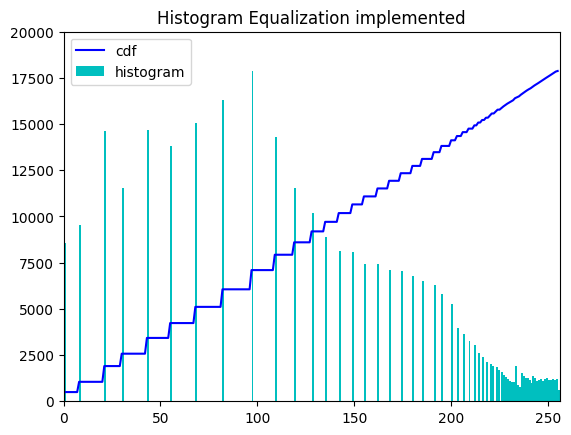

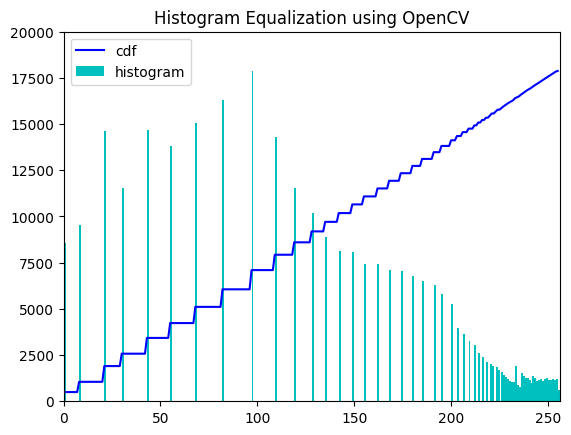

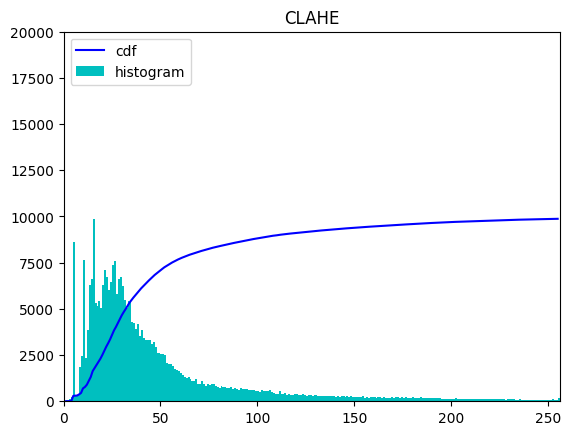

In [4]:
h1,c1=graph(src1)
plt.plot(c1, color = 'b')
plt.hist(src1.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.ylim([0,20000])
plt.title('Base Image')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

h2,c2=graph(p)
plt.plot(c2, color = 'b')
plt.hist(p.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.ylim([0,20000])
plt.title('Histogram Equalization implemented')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

h3,c3=graph(i1)
plt.plot(c3, color = 'b')
plt.hist(i1.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.ylim([0,20000])
plt.title('Histogram Equalization using OpenCV')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

h4,c4=graph(cla)
plt.plot(c4, color = 'b')
plt.hist(cla.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.ylim([0,20000])
plt.title('CLAHE')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Observations: 

The initial image is quite dark and a lot of details are not visible clearly. The histogram shows a clustering at the lower intensity levels and low contrast. 

Applying histogram equalisation made the image look brighter with higher contrast but there are discontinuations between pixel values in the image due to mapping of discrete pixel values and skipping pixels in the lower intensity levels. It usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast. 

CLAHE method produces a much better compared to just HE. HE is a global method and doesn't consider neighboring pixel values when equalizing while CLAHE utilises a nearby n*n grid to compute the normalisation. CLAHE clips the pdf values to a prespecified one and distributes the remaining pixels equally in all the other bins. CLAHE produces relatively better results as can be seen from the histograms. 

In CLAHE histogram, the peaks of the pixels numbers are quite less in magnitude as compared to global HE, leading to a better image and lesser overamplification of pixel values.